# Exploring the Problem with a Machine learning Model

We split the project into 2 main parts: Data Preprocessing and model training.

### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

### Load the Data

In [2]:
data_preprocessed = pd.read_csv('absenteeism/preprocessed_Absenteeism_data.csv')

### Create the targets

In [3]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [4]:
# The median of Absenteeism Time in Hours is 3 hours. We'll create two categories:
# Moderately Absent (if < Median)
# Extremely Absent (if > Median )

targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [5]:
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0
5,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2,0
6,0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,8,1
7,0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,4,1
8,0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,40,1
9,0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,8,1


### A comment on the targets

In [6]:
#Calculate the percentage of 1s in the Excessive Absenteeism column
targets.sum() / targets.shape[0] * 100
# 45.5% of the data has Excessive Absenteeism = 1 and 54.5% has Moderate Absenteeism = 0

45.57142857142858

In [7]:
# Drop the 'Absenteeism Time in Hours' column:

data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the Week',
                                            'Daily Work Load Average','Distance to Work'],axis=1)

### Select the input for the regression

In [8]:
data_with_targets.shape

(700, 12)

In [9]:
data_with_targets.iloc[:, 0:14]
# Selecting the first 14 columns as inputs (features)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [10]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

### Standardize the data (Feature Scaling)

In [11]:
from sklearn.preprocessing import StandardScaler

absenteeism_scaler = StandardScaler()

In [12]:
# Standerdize my data for the logistic regression model.

# absenteeism_scaler.fit(unscaled_inputs)
# scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
# scaled_inputs

# Create a CustomScaler class :

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns, with_mean=True, with_std=True):
        self.scaler = StandardScaler(with_mean=with_mean, with_std=with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        self.mean_ = np.mean(X[self.columns], axis=0)  # Specifying axis=0 for column-wise mean
        self.var_ = np.var(X[self.columns], axis=0)  # Specifying axis=0 for column-wise variance
        return self
    
    def transform(self, X):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]
    
    def get_params(self, deep=True):
        return {"columns": self.columns, "with_mean": self.scaler.with_mean, "with_std": self.scaler.with_std}
    
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [13]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [14]:
# columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
#                     'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets']
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [15]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [16]:
absenteeism_scaler = CustomScaler(columns_to_scale)

In [17]:
absenteeism_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'])

In [18]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


### Split the data into train and test and shuffle the data

In [19]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
# scaled_inputs: The features (input data) to be used for training and testing.
# targets: The target variable (output data) to be predicted.
# train_size=0.8: 80% of the data will be used for training, and the remaining 20% for testing.
# random_state=20: Ensures reproducibility of the split by setting a random seed.

X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=20)

# Check the shapes of the resulting arrays to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Output:
# ((560, 14), (140, 14), (560,), (140,))
# Explanation of the output:
# - X_train.shape: (560, 14) -> 560 samples in the training set, each with 14 features.
# - X_test.shape: (140, 14) -> 140 samples in the testing set, each with 14 features.
# - y_train.shape: (560,) -> 560 target values corresponding to the training set.
# - y_test.shape: (140,) -> 140 target values corresponding to the testing set.


((560, 11), (140, 11), (560,), (140,))

## Logistic Regression Model

In [20]:
# import the relevant libraries for the logistic regression model:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training Model

In [21]:
# Apply the logistic regression model to the training data.

reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Evaluate the model performance on the training set using the R^2 score
# reg: The trained regression model (assumed to be defined and trained earlier in the code).
# X_train: The input features of the training set.
# y_train: The target values of the training set.
# The score() method returns the R^2 (coefficient of determination) score, which indicates how well the model explains the variance in the target variable.
# A score closer to 1.0 indicates a better fit.

train_score = reg.score(X_train, y_train)
train_score

# Output:
# 0.775
# Based on the data we used, our model learned to classify 77.5% of the training data correctly.


0.7732142857142857

### Manually check the accuracy of the model

In [23]:
# Use the trained regression model to make predictions on the training set
# reg: The trained regression model (assumed to be defined and trained earlier in the code).
# X_train: The input features of the training set.

model_output = reg.predict(X_train)
model_output

# The output would be an array of predicted values corresponding to the training set input features.
# These values represent the model's predictions for the target variable based on the training data.
# For example, if reg is a linear regression model predicting absenteeism time, the output might look like this:
# array([ 0, 1, 1, 1, 1, ...,  1, 1, 0, 0, 0, 0])
# Each value in the array corresponds to a prediction made by the model for a particular sample in the training set.

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [24]:
# Training Target Values
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [25]:
# Compare the predicted values with the actual target values
model_output == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [26]:
# Calculate the total number of correct predictions (True entries)
np.sum(model_output == y_train)

433

In [27]:
# Total # of entries
model_output.shape[0]

560

In [28]:
# Manually calculate the accuracy
np.sum(model_output == y_train) / model_output.shape[0]

0.7732142857142857

### Finding the intercept and coefficients of the logistic regression model

In [29]:
# Finding the intercept and coefficients is done using the 'intercept_' and 'coef_' attributes of the logistic regression
intercept = reg.intercept_[0]
intercept

-1.6469898034385992

In [30]:
coefficients = reg.coef_[0]
coefficients

array([ 2.80000644,  0.95174778,  3.1140605 ,  0.83835931,  0.15897713,
        0.60513709, -0.16990589,  0.27998236, -0.21017416,  0.34842434,
       -0.27721907])

In [31]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [32]:
feature_name = unscaled_inputs.columns.values

In [33]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name) 
summary_table['Coefficients'] = np.transpose(coefficients)
summary_table

,Feature Name,Coefficients
0,Reason_1,2.800006
1,Reason_2,0.951748
2,Reason_3,3.114061
3,Reason_4,0.838359
4,Month Value,0.158977
5,Transportation Expense,0.605137
6,Age,-0.169906
7,Body Mass Index,0.279982
8,Education,-0.210174
9,Children,0.348424


In [34]:
# add the intercept to the summary table

summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', intercept]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.646990
1,Reason_1,2.800006
2,Reason_2,0.951748
3,Reason_3,3.114061
4,Reason_4,0.838359
5,Month Value,0.158977
6,Transportation Expense,0.605137
7,Age,-0.169906
8,Body Mass Index,0.279982
9,Education,-0.210174


In [35]:
# Add the odd ratio column and sort the table by the odd ratio in descending order:

summary_table['Odds Ratio'] = np.exp(summary_table['Coefficients'])
summary_table = summary_table.sort_values('Odds Ratio', ascending=False)
summary_table

# If the odd ratio is close to 1 or its coefficient is arround 0, this mean that this feature does not significantly impact the target variable.

# Daily Work Load Average: Coefficient = -0.000077, Odds Ratio = 0.999923
# The coefficient is extremely close to zero, indicating almost no effect on the outcome.

# Distance to Work: Coefficient = -0.007779, Odds Ratio = 0.992251
# The coefficient is very small, suggesting a minimal impact on the model's predictions.

# Most important features in predicting absenteeism time:
# 1. Reason_3
# 2. Reason_1	
# 3. Reason_2	
# 4. Reason_4
# 5. Transportation Expense	
# 6. Children
# 7. Body Mass Index	
# 8. Pets	
# 9. Education	


# reason_type_0: No reason for absence
# reason_type_1: Various Diseases
# reason_type_2: Pregnancy and giving birth
# reason_type_3: Poisoning
# reason_type_4: Light Diseases

,Feature Name,Coefficients,Odds Ratio
3,Reason_3,3.114061,22.512270
1,Reason_1,2.800006,16.444753
2,Reason_2,0.951748,2.590233
4,Reason_4,0.838359,2.312570
6,Transportation Expense,0.605137,1.831503
10,Children,0.348424,1.416833
8,Body Mass Index,0.279982,1.323106
5,Month Value,0.158977,1.172311
7,Age,-0.169906,0.843744
9,Education,-0.210174,0.810443


### Test the model 

In [36]:
reg.score(X_test, y_test)

0.75

In [37]:
predict_proba = reg.predict_proba(X_test)
predict_proba

array([[0.71342516, 0.28657484],
       [0.5873216 , 0.4126784 ],
       [0.44016153, 0.55983847],
       [0.78163061, 0.21836939],
       [0.08407928, 0.91592072],
       [0.3348226 , 0.6651774 ],
       [0.29971206, 0.70028794],
       [0.13112385, 0.86887615],
       [0.78627908, 0.21372092],
       [0.74906578, 0.25093422],
       [0.49395555, 0.50604445],
       [0.22492002, 0.77507998],
       [0.07135527, 0.92864473],
       [0.73173354, 0.26826646],
       [0.30957854, 0.69042146],
       [0.54726422, 0.45273578],
       [0.55051921, 0.44948079],
       [0.53926379, 0.46073621],
       [0.40197149, 0.59802851],
       [0.05365482, 0.94634518],
       [0.70030387, 0.29969613],
       [0.78163061, 0.21836939],
       [0.42028246, 0.57971754],
       [0.42028246, 0.57971754],
       [0.24801464, 0.75198536],
       [0.74567806, 0.25432194],
       [0.51026557, 0.48973443],
       [0.8569309 , 0.1430691 ],
       [0.20365204, 0.79634796],
       [0.78163061, 0.21836939],
       [0.

In [38]:
predict_proba.shape
# First column is the probability of being 0 and the second column is the probability of being 1.

(140, 2)

In [39]:
# Take the second column as the predicted probabilities of absence time.
predict_proba[:,1]

array([0.28657484, 0.4126784 , 0.55983847, 0.21836939, 0.91592072,
       0.6651774 , 0.70028794, 0.86887615, 0.21372092, 0.25093422,
       0.50604445, 0.77507998, 0.92864473, 0.26826646, 0.69042146,
       0.45273578, 0.44948079, 0.46073621, 0.59802851, 0.94634518,
       0.29969613, 0.21836939, 0.57971754, 0.57971754, 0.75198536,
       0.25432194, 0.48973443, 0.1430691 , 0.79634796, 0.21836939,
       0.36947677, 0.67913195, 0.68508325, 0.52870791, 0.21836939,
       0.53505228, 0.22144744, 0.73673169, 0.40500758, 0.60504297,
       0.21072119, 0.45227108, 0.23749326, 0.39847178, 0.82763577,
       0.56771922, 0.69120847, 0.28657484, 0.2192347 , 0.2032712 ,
       0.57634482, 0.32954238, 0.6651774 , 0.26937528, 0.83323682,
       0.43484145, 0.88365871, 0.23125087, 0.33433749, 0.34451397,
       0.69915101, 0.6549938 , 0.29244583, 0.79186052, 0.20752232,
       0.26838009, 0.08710411, 0.22144744, 0.73215219, 0.30536526,
       0.22144744, 0.2900789 , 0.90443841, 0.46065771, 0.60175

### Save the model 

In [40]:
# save the model:

import pickle
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [41]:
# same code as the one in the last code and pickle the scaler :
with open('scaler', 'wb') as file:
    pickle.dump(absenteeism_scaler, file)

Accuracy: 0.7500
Precision: 0.7541
Recall: 0.6970
F1 Score: 0.7244

Confusion Matrix:
[[59 15]
 [20 46]]


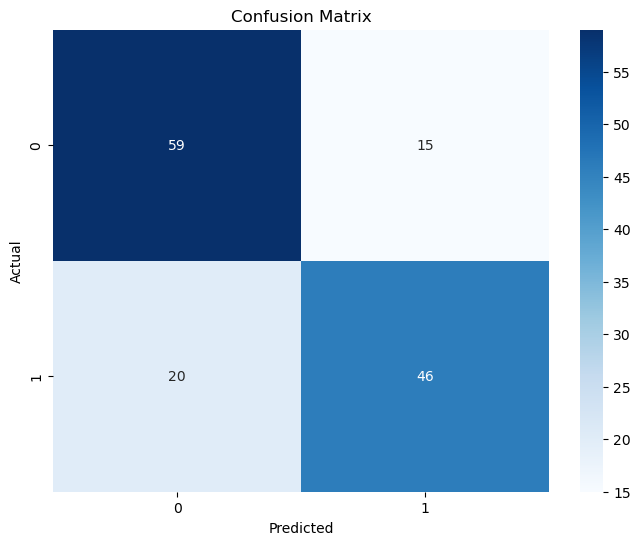

In [42]:
# After training the model and making predictions on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()